<font color='maroon' size='5'>**Model Selection & Hyperparameters Tunning: GridSearchCV & Pipeline**</font> 
----
-----


Model selection and hyperparameters tunning is an essential part of any ML project and one of the most time consuming.
Even for the simplest models it can take hours to find the optimal parameters not mentioning neural nets that can be optimized day, weeks or even longer.

Lets go into a litte more depth regarding model selection and selection of hyperparameters. Of core importance is the following question: ***if our estimator is underperforming, how should we move forward?***

There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

The answer to this question is often counter-intuitive.
In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results!
The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

----


 
- How do I choose **which model to use** for my learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?



<font color='maroon' size='5'>**The Bias-Variance Trade-off**</font> 
----
-----


Fundamentally, the question of **"the best model"** is about finding a sweet spot in the tradeoff between **bias** and **variance**.

----

In [1]:
import numpy as np
from scipy import stats

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

sns.set_palette("rocket")
# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.filterwarnings('ignore')

<font color=maroon size='4'>**Polynomial Regression**</font> 
----

Generate random sample to demonstrate underfitting and overfitting 

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
def create1DData(size=100, seed=13):
    np.random.seed(seed)
    x = np.linspace(-5, 5, size)
    y =  x + 7 * (x ** 2) - 1 * (x ** 3) + np.random.normal(0, 11, size)
    return x,y


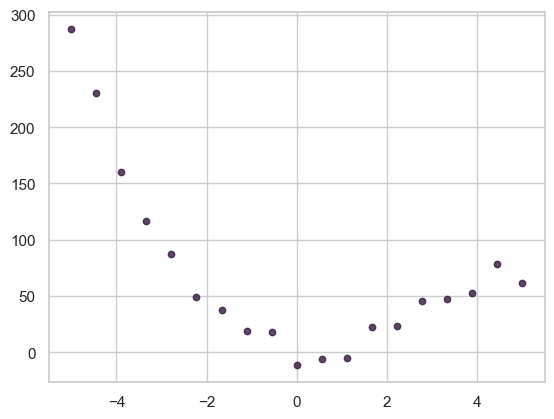

In [4]:
X, y = create1DData(19)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
plt.scatter(X, y, s=21, alpha=0.8)
plt.show()

<font color=maroon size='3'>**Underfitting**</font> 
----

The model at the bottom attempts to find a **straight-line** fit through the data.
Because the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well.
Such a model is said to **underfit** the data: that is, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has **high bias**.

In [5]:
linReg = LinearRegression()
linReg.fit(X,y)
yPred1 = linReg.predict(X)

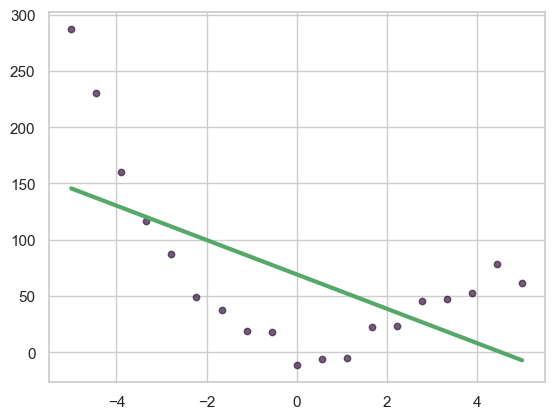

In [6]:
fig, ax = plt.subplots()
ax.scatter(X, y, s=21, alpha=0.7)
order1, = ax.plot(X, yPred1, color='g', label="1st order", linewidth=3)
plt.show()

In [7]:
XTest, yTest = create1DData(19, 19)
XTest = XTest.reshape(-1,1)
yTest = yTest.reshape(-1,1)
yTestPred1 = linReg.predict(XTest)

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
print(f'MSE score (train):', mean_squared_error(y, yPred1))

MSE score (train): 3855.488742512097


In [10]:
print(f'MSE score (test):', mean_squared_error(yTest, yTestPred1))

MSE score (test): 4019.900732046667


<font color=maroon size='3'>**Overfitting**</font> 
----
The model at the bottom attempts to fit a **high-order** polynomial through the data.
Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data.
Such a model is said to **overfit** the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has **high variance**.

In [11]:
polyFeature20 = PolynomialFeatures(degree=20)
xPoly20 = polyFeature20.fit_transform(X)
linReg = LinearRegression()
linReg.fit(xPoly20, y)
yPred20 = linReg.predict(xPoly20)

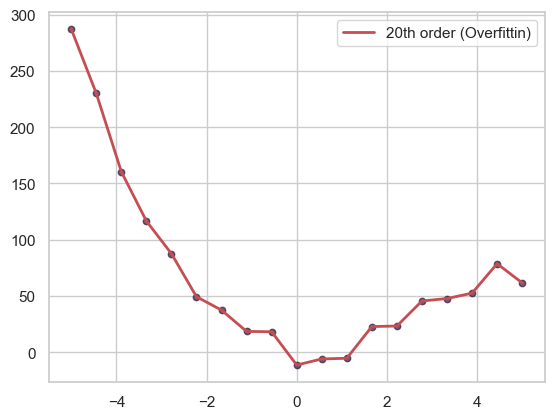

In [12]:
fig, ax = plt.subplots()

ax.scatter(X, y, s=21, alpha=0.7)
order20, = ax.plot(X, yPred20, color='r', label="20th order (Overfittin)", linewidth=2)
ax.legend()
plt.show()

In [13]:
_xPoly20 = polyFeature20.fit_transform(XTest)
linReg.fit(_xPoly20, yTest)
yTestPred20 = linReg.predict(_xPoly20)

In [14]:
print(f'MSE score (train):', mean_squared_error(y, yPred20))

MSE score (train): 0.0008856981674228492


In [15]:
print(f'MSE score (test):', mean_squared_error(yTest, yTestPred20))

MSE score (test): 0.0003157550946941954


In [16]:
from sklearn.metrics import r2_score
r2_score(yTest, yTestPred20)

0.999999949080964

<font color=maroon size='3'>**Bestfitting**</font> 
----

**The best model** is about finding a sweet spot in the tradeoff between bias and variance.

In [17]:
polyFeature3 = PolynomialFeatures(degree=3)
xPoly3 = polyFeature3.fit_transform(X)
linReg3=LinearRegression()
linReg3.fit(xPoly3, y)
yPred3 = linReg3.predict(xPoly3)

In [18]:
polyFeature3.get_params()

{'degree': 3, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

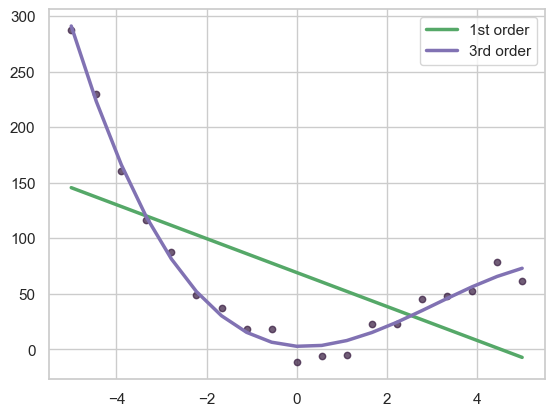

In [19]:
fig, ax = plt.subplots()
ax.scatter(X, y, s=21, alpha=0.7)
order1, = ax.plot(X, yPred1, color='g', label="1st order", linewidth=2.5)
order3, = ax.plot(X, yPred3, color='m', label="3rd order", linewidth=2.5)
ax.legend()
plt.show()


In [20]:
_xPoly3 = polyFeature3.fit_transform(XTest)
linReg.fit(_xPoly3, yTest)
yTestPred3 = linReg.predict(_xPoly3)

In [21]:
print(f'MSE score (train):', mean_squared_error(y, yPred3))

MSE score (train): 68.53840319270698


In [22]:
print(f'MSE score (test):', mean_squared_error(yTest, yTestPred3))

MSE score (test): 75.28127216183863


In [23]:
from sklearn.metrics import r2_score
r2_score(yTest, yTestPred3)

0.9878600539655733

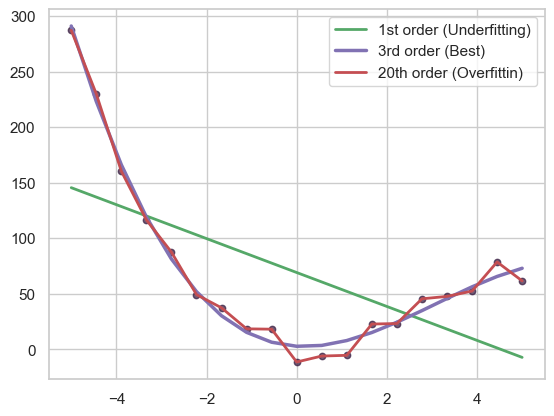

In [24]:
fig, ax = plt.subplots()

ax.scatter(X, y, s=21, alpha=0.7)
order1, = ax.plot(X, yPred1, color='g', label="1st order (Underfitting)", linewidth=2)
order3, = ax.plot(X, yPred3, color='m', label="3rd order (Best)", linewidth=2.5)
order20, = ax.plot(X, yPred20, color='r', label="20th order (Overfittin)", linewidth=2)
ax.legend()
plt.show()

#### Bias-Variance Trade-off
----
- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

-----

<img src="biasvariance.png" width="480">

-----



<font color=maroon size='3'>**Validation Curve**</font> 
-------


<img src="validationCurve.png" width="480">

-----

The diagram shown here is often called a *validation curve*, and we see the following essential features:

- The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

The means of tuning the model complexity varies from model to model; when we discuss individual models in depth in later sections, we will see how each model allows for such tuning.

<font color=maroon size='4'>**Regularization**</font> 
----
------

#### Lasso regression ($L_1$ regularization)

-----

Lasso regression minimizes mean squared error with L1 regularization:

$$ error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.


- small $\alpha$ coefficient (weak regularization)

This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator:


------

#### Ridge regression ($L_2$ Regularization)

---
Ridge regression minimizes mean squared error with L2 regularization:

$$ error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:
There is a special class [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) for Ridge regression cross-validation.


In [25]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Lasso, Ridge

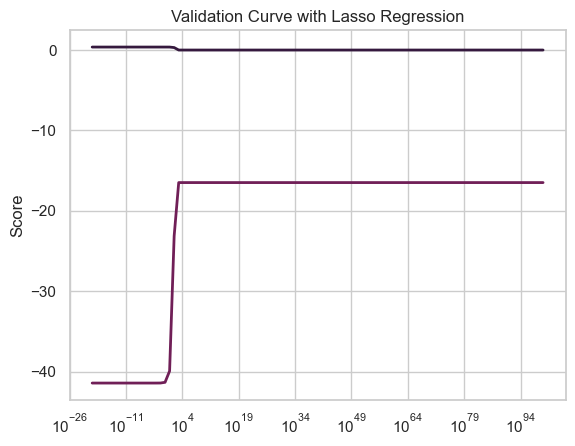

In [26]:
paramRangeLasso = np.logspace(-20.0, 100, num=100)

trainScoresLasso, validScoresLasso = validation_curve(
    Lasso(), X, y, param_name="alpha", param_range=paramRangeLasso, cv=5
)

plt.title("Validation Curve with Lasso Regression")
plt.ylabel("Score")
plt.semilogx(
    paramRangeLasso, trainScoresLasso.mean(axis=1), label="Training score", lw=2
)
plt.semilogx(
    paramRangeLasso, validScoresLasso.mean(axis=1), label="Cross-validation score", lw=2
)
plt.show()


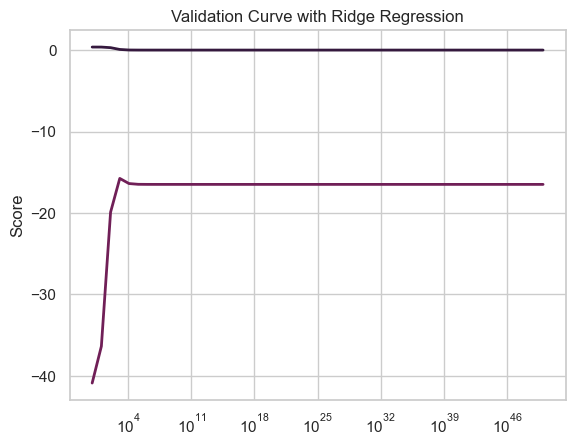

In [27]:

paramRangeRidge = np.logspace(0.0, 50)
trainScoresRidge, validScoresRidge = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=paramRangeRidge, cv=5
)

plt.title("Validation Curve with Ridge Regression")
plt.ylabel("Score")
plt.semilogx(
    paramRangeRidge, trainScoresRidge.mean(axis=1), label="Training score", lw=2
)
plt.semilogx(
    paramRangeRidge, validScoresRidge.mean(axis=1), label="Cross-validation score", lw=2
)

plt.show()


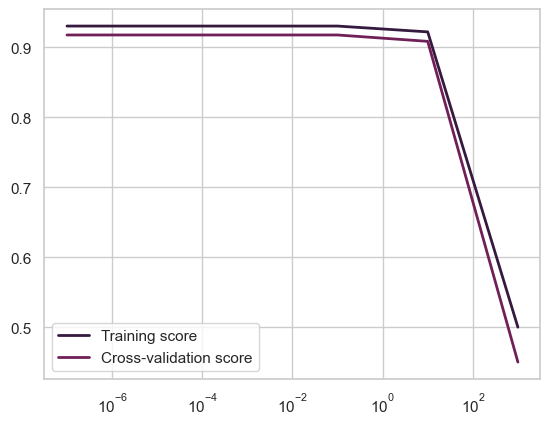

In [28]:
from sklearn.datasets import load_iris

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

paramRange = np.logspace(-7, 3, 6, 140)

trainScores, validScores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=paramRange,
    cv=5)

plt.semilogx(
    paramRange, trainScores.mean(axis=1), label="Training score", lw=2
)
plt.semilogx(
    paramRange, validScores.mean(axis=1), label="Cross-validation score", lw=2
)
plt.legend(loc="best")
plt.show()


<font color='maroon' size='5'>**Tuning the hyper-parameters of an estimator**</font> 
----
-----

In the previous weeks, we saw the basic recipe for applying a supervised machine learning model:

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

The first two pieces of this—the choice of model and choice of hyperparameters—are perhaps the most important part of using these tools and techniques effectively.
In order to make an informed choice, we need a way to *validate* that our model and our hyperparameters are a good fit to the data.
While this may sound simple, there are some pitfalls that you must avoid to do this effectively.



-----

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

The following sections first show a naive approach to model validation and why it fails, before exploring the use of holdout sets and cross-validation for more robust model evaluation.



In [29]:
penguinsDf = sns.load_dataset("penguins")
penguins = penguinsDf.dropna()
penDf = penguins.copy()

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Initalization of the label encoder
le = LabelEncoder()
yPen=penguins.species
yPen = le.fit_transform(yPen.values)


In [31]:
XPen=penguins.drop(['species', 'island', 'sex'], axis=1)
XPen.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [32]:
# Use StandardScaler to apply Standardisation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xPenSs = ss.fit_transform(XPen)
XPenSs =  pd.DataFrame(
    xPenSs, columns=[XPen.columns]
)
yPenSs=yPen
XPenSs.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
XPenSsTrain, XPenSsTest, yPenSsTrain, yPenSsTest = train_test_split(XPenSs, yPen, test_size=0.25, random_state=42)

In [35]:
print("Train size:", XPenSsTrain.shape)
print("Test size:", XPenSsTest.shape)

Train size: (249, 4)
Test size: (84, 4)


##### KNN Overfitting

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knnClf1 = KNeighborsClassifier(n_neighbors=1)

knnClf1.fit(XPenSsTrain, yPenSsTrain)
# predicting the values with the help of unseen data (test data)
yPenKnnPredTrain = knnClf1.predict(XPenSsTrain)
yPenKnnPredTest = knnClf1.predict(XPenSsTest)


print('Train Score:',knnClf1.score(XPenSsTrain, yPenSsTrain))
print('Test Score:', knnClf1.score(XPenSsTest, yPenSsTest))

Train Score: 1.0
Test Score: 1.0


#### KNN for different K values

In [37]:
# try K=1 through K=25 and record testing accuracy
from sklearn import metrics
kRange = list(range(1, 20))
scores = []
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XPenSsTrain, yPenSsTrain)
    yPenKnnPred = knn.predict(XPenSsTest)
    scores.append(metrics.accuracy_score(yPenSsTest, yPenKnnPred))

Text(0, 0.5, 'Testing Accuracy')

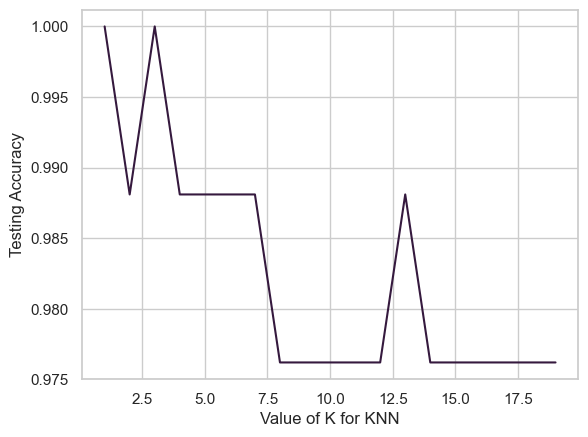

In [38]:
# plot the relationship between K and testing accuracy
plt.plot(kRange, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### K-fold Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

kRange = list(range(1, 20))
cvScores = []
kScores = []
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    cvScores = cross_val_score(knn, XPenSs, yPenSs, cv=10, scoring='accuracy')
    kScores.append(cvScores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

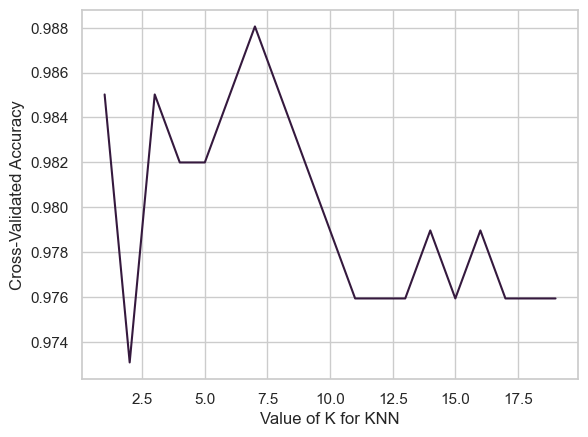

In [40]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(kRange, kScores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

<font color='maroon' size='4'>**Validation in Practice: ``GridSearchCV``**</font> 
----
-----

- Grid search is a very traditional technique for implementing hyperparameters. It **brute force all combinations**. 
- `scikit-learn` provides automated tools to do this in the grid search module with ``GridSearchCV`` meta-estimator.
Here is an example of using grid search to find the optimal polynomial model.
    - Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation



### Grid search for KNN

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
kRange = list(range(1, 20))
# create a parameter grid: map the parameter names to the values that should be searched
gridCvParamsKnn = dict(n_neighbors = kRange)


In [43]:
# instantiate the grid
gridSearchCvKnn = GridSearchCV(knn, gridCvParamsKnn, cv=10, scoring='accuracy')

In [44]:
gridSearchCvKnn.fit(XPenSs, yPenSs)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

Now that this is fit, we can ask for the best parameters as follows:

In [45]:
gridSearchCvKnn.best_params_

{'n_neighbors': 7}

We can visualize the results 

In [46]:

pd.DataFrame(gridSearchCvKnn.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.985027,0.020198,{'n_neighbors': 1}
1,0.973084,0.028366,{'n_neighbors': 2}
2,0.985027,0.020198,{'n_neighbors': 3}
3,0.981996,0.019996,{'n_neighbors': 4}
4,0.981996,0.019996,{'n_neighbors': 5}
5,0.985027,0.014976,{'n_neighbors': 6}
6,0.988057,0.014630,{'n_neighbors': 7}
7,0.985027,0.020198,{'n_neighbors': 8}
8,0.981996,0.027698,{'n_neighbors': 9}
9,0.978966,0.019323,{'n_neighbors': 10}


In [47]:
# examine the first result
print(gridSearchCvKnn.cv_results_['params'][0])
print(gridSearchCvKnn.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.9850267379679145


In [48]:
# print the array of mean scores only
gridMeanScores = gridSearchCvKnn.cv_results_['mean_test_score']
print(gridMeanScores)

[0.98502674 0.97308378 0.98502674 0.98199643 0.98199643 0.98502674
 0.98805704 0.98502674 0.98199643 0.97896613 0.97593583 0.97593583
 0.97593583 0.97896613 0.97593583 0.97896613 0.97593583 0.97593583
 0.97593583]


Text(0, 0.5, 'Cross-Validated Accuracy')

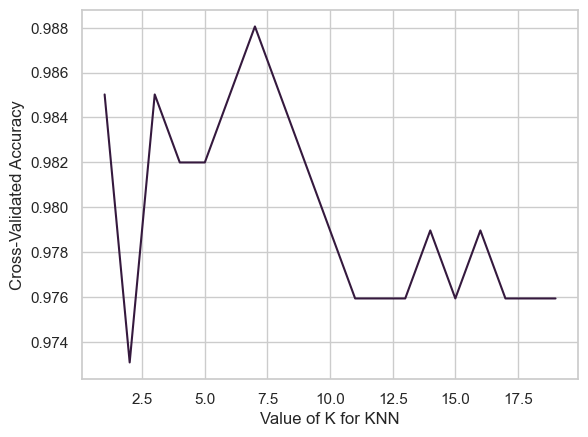

In [49]:
# plot the results
plt.plot(kRange, gridMeanScores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

<font color='maroon' size='3'>**Searching multiple parameters simultaneously**</font> 
----
-----


- **Example:** tuning `max_depth`, `max_features`, and `criterion` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `max_features` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

XPenTrain, XPenTest, yPenTrain, yPenTest = train_test_split(
    XPen, yPen, test_size=0.25, random_state=21)

dtClfRnd = DecisionTreeClassifier(splitter='random', criterion='entropy')

# fitting our model
dtClfRnd.fit(XPenTrain, yPenTrain)


# predicting the values with the help of unseen data (test data)
yPenDtPredTrain = dtClfRnd.predict(XPenTrain)
yPenDtPredTest = dtClfRnd.predict(XPenTest)


print('Train Score:',dtClfRnd.score(XPenTrain, yPenTrain))
print('Test Score:', dtClfRnd.score(XPenTest, yPenTest))

Train Score: 1.0
Test Score: 0.9642857142857143


In [51]:
gridCvParamsDt = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

In [52]:
dtClf = DecisionTreeClassifier(random_state=2103)

In [53]:
gridSearchCvDt=GridSearchCV(estimator=dtClf, param_grid=gridCvParamsDt, cv=5)

In [54]:
gridSearchCvDt.fit(XPen, yPen)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2103),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [55]:
gridSearchCvDt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt',
                       random_state=2103)

In [56]:
# examine the best model
print(gridSearchCvDt.best_score_)
print(gridSearchCvDt.best_params_)

0.9608774310266848
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}


#### Using the best parameters to make predictions

In [57]:
dtGridBest = tree.DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', 
                                         max_depth=7, max_features='log2')

# fitting our model
dtGridBest.fit(XPenTrain, yPenTrain)

yPenDtGridTest = dtGridBest.predict(XPenTest)

print('Test Score:', dtGridBest.score(XPenTest, yPenTest))

Test Score: 0.9404761904761905


In [58]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
dtGridBest = tree.DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', 
                                         max_depth=7, max_features='log2')
scoresDtBestGrid = cross_val_score(dtGridBest, XPen, yPen, cv=5, scoring='accuracy')
print(scoresDtBestGrid.mean())

0.9579375848032564


#### GridSearch for different classifiers
----
- Choose classifiers and hyper-parameters

In [59]:
gridCvHyperParams = {
    'knnClf': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 4, 5, 6, 7, 8],
            'weights': ['uniform', 'distance']
        }
    },
    'dtClf': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [5, 6, 7, 8, 9],
            'criterion': ['gini','entropy'],
            'splitter': ['best', 'random']
        }
    }
}

In [60]:
gridScores = []

for modelName, mp in gridCvHyperParams.items():
    gridSearchClf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    gridSearchClf.fit(XPenTrain, yPenTrain)
    gridScores.append({
        'model': modelName,
        'best_score': gridSearchClf.best_score_,
        'best_params': gridSearchClf.best_params_
    })
    
gsDf = pd.DataFrame(gridScores,columns=['model','best_score','best_params'])
gsDf

,model,best_score,best_params
0,knnClf,0.811333,"{'n_neighbors': 3, 'weights': 'distance'}"
1,dtClf,0.968000,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."


<font color='maroon' size='4'>**Randomized Parameter Optimization: `RandomizedSearchCV`**</font> 
----
-----

`RandomizedSearchCV` is on average more effective than ``GridSearchCV``

- Reducing computational expense using RandomizedSearchCV
    - Searching many different parameters at once may be computationally infeasible
    - `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"
    
   
Main advantages:
1. Don't spend time on meaningless parameters. On every step random search variate all parameters.
2. On average finds sub optimal parameters much faster than ``GridSearchCV``.
3. It is not limited by grid when we optimize continuous parameters.

Disadvantages:
1. It may not find the global optimal parameter on a grid.
2. All steps are independent. On every particular step it does not use any information about the results gathered so far. But they can be useful. 
    - For example, if we found a good solution it can be useful to search around it to find even better point comparing to looking at other completely random variants.

------


In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
kRange = list(range(1, 20))
weightOptions = ['uniform', 'distance']

rndCvParamsKDist = dict(n_neighbors=kRange, weights=weightOptions)
knnRndCv = KNeighborsClassifier()

**Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [63]:
# n_iter controls the number of searches
rndSearchCvKnn = RandomizedSearchCV(
    knnRndCv, rndCvParamsKDist, cv=10, scoring='accuracy', n_iter=50
)

rndSearchCvKnn.fit(XPen, yPen)
#pd.DataFrame(rndSearchKnnResults.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rndSearchKnnResults = pd.DataFrame.from_dict(rndSearchCvKnn.cv_results_, orient='columns')
rndSearchKnnResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000853,0.001099,0.004527,0.005991,uniform,1,"{'weights': 'uniform', 'n_neighbors': 1}",0.823529,0.823529,0.911765,0.818182,0.848485,0.787879,0.848485,0.878788,0.939394,0.939394,0.861943,0.050475,1
1,0.000911,0.000702,0.000994,0.000895,distance,1,"{'weights': 'distance', 'n_neighbors': 1}",0.823529,0.823529,0.911765,0.818182,0.848485,0.787879,0.848485,0.878788,0.939394,0.939394,0.861943,0.050475,1
2,0.004691,0.007166,0.001562,0.004687,uniform,2,"{'weights': 'uniform', 'n_neighbors': 2}",0.676471,0.764706,0.882353,0.727273,0.727273,0.727273,0.818182,0.878788,0.909091,0.878788,0.799020,0.079870,14
3,0.001562,0.004686,0.003122,0.006245,distance,2,"{'weights': 'distance', 'n_neighbors': 2}",0.823529,0.823529,0.911765,0.818182,0.848485,0.787879,0.848485,0.878788,0.939394,0.939394,0.861943,0.050475,1
4,0.001200,0.000871,0.002873,0.002476,uniform,3,"{'weights': 'uniform', 'n_neighbors': 3}",0.676471,0.794118,0.764706,0.787879,0.727273,0.727273,0.787879,0.818182,0.909091,0.878788,0.787166,0.066486,26


In [64]:
# examine the best model
print(rndSearchCvKnn.best_score_)
print(rndSearchCvKnn.best_params_)

0.8619429590017825
{'weights': 'uniform', 'n_neighbors': 1}


<font color='maroon' size='4'>**Searching for optimal parameters with successive halving: `HalvingGridSearchCV`**</font> 
----
-----

- Halving Grid Search is less computationally expensive than the ``GridSearchCV`` approach. `scikit-learn` library comes up with `HalvingGridSearch` implementation.
    - `HalvingGridSearch` is an optimized version of ``GridSearchCV`` hyperparameter optimization. 
        - Searches over a specified list of hyperparameters using a successive halving approach. 
    - The search strategy starts evaluating all the candidates on a small sample of the data and iteratively selects the best candidates using more and more larger samples.



In [65]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [66]:
halvingGridParamsDt = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dtClf = DecisionTreeClassifier(random_state=2103)
halvingGridSearchDt = HalvingGridSearchCV(
    dtClf, halvingGridParamsDt, cv=5,
    factor=2, max_resources=50).fit(XPen, yPen)

In [67]:
halvingGridSearchDt.n_resources_

[30]

In [68]:
halvingGridSearchDt.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=2103)

In [69]:
halvingGridSearchDt.best_score_

0.9333333333333333

<font color='maroon' size='4'>**Pipeline**</font> 
----
-----


Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator. 
- The most common tool is a `Pipeline`. 

----

<img src="pipe.png" width="690">


----


#### Safety
Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).


#### Convenience and encapsulation
You only have to call fit and predict once on your data to fit a whole sequence of estimators.


#### Joint parameter selection
You can grid search over parameters of all estimators in the pipeline at once.


#### Construction

The `Pipeline` is built using a list of tuple`(key, value)` pairs, where the key is a string containing the name you want to give this step and value is an estimator object:

------

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
pipeKnn7 = Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=7))])

In [72]:
pipeKnn7.fit(XPenTrain, yPenTrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))])

In [73]:
pipeKnn7.score(XPenTest, yPenTest)

0.9642857142857143

In [74]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipeSvc = Pipeline([('dimRed', PCA(n_components=3)), ('clf', SVC())])

pipeSvc.fit(XPenTrain, yPenTrain)

pipeSvc.score(XPenTest, yPenTest)

0.7619047619047619

In [75]:
pipeSvcSs = Pipeline([
    ("scaler", StandardScaler()), 
    ('dimRed', PCA(n_components=3)), 
    ('clf', SVC())]
)

pipeSvcSs.fit(XPenTrain, yPenTrain)

pipeSvcSs.score(XPenTest, yPenTest)

0.9642857142857143

#### Convenient Pipeline creation with ``make_pipeline``

The utility function `make_pipeline` is a shorthand for constructing pipelines; it takes a variable number of estimators and returns a pipeline, filling in the names automatically:

In [76]:
from sklearn.pipeline import make_pipeline

In [77]:
makePipeKnn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# apply scaling on training data
makePipeKnn.fit(XPenTrain, yPenTrain) 

makePipeKnn.score(XPenTest, yPenTest)

0.9761904761904762

#### Accessing steps

The estimators of a `Pipeline` are stored as a list in the `steps` attribute, but can be accessed by index or name by indexing (with `[idx]`) the Pipeline:

In [78]:
makePipeKnn.steps[0]

('standardscaler', StandardScaler())

In [79]:
makePipeKnn[0]

StandardScaler()

In [80]:
makePipeKnn['standardscaler']

StandardScaler()

----
<font color='maroon' size='4'>**Pipeline in GridSearchCV: Chaining estimators**</font> 
----
-----

Parameters of the estimators in the pipeline can be accessed using the `<estimator>__<parameter>` syntax:

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

----

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [82]:
pca = PCA()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
# SCALER
scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [83]:
#KNN
kRange = list(range(1, 20))
weightOptions = ['uniform', 'distance']

#DECISION TREE
maxFeatures = ['auto', 'sqrt', 'log2']
maxDepth = [5, 6, 7, 8, 9]
imputers = ['gini', 'entropy']

# PCA
pcaNumComponents = [1, 2, 3]

# SVC
C = [0.1, 10, 100]

In [84]:
pipePcaSvc = Pipeline([("scaler", StandardScaler()), ('dimRed', PCA(n_components=3)), ('svc', SVC())])

paramsGridPipePcaSvc = dict(dimRed__n_components=pcaNumComponents, svc__C=C)

gridSearchPipePcaSvc = GridSearchCV(pipePcaSvc, param_grid=paramsGridPipePcaSvc)

In [85]:
gridSearchPipePcaSvc.fit(XPenTrain, yPenTrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dimRed', PCA(n_components=3)),
                                       ('svc', SVC())]),
             param_grid={'dimRed__n_components': [1, 2, 3],
                         'svc__C': [0.1, 10, 100]})

In [86]:
gridSearchPipePcaSvc.best_params_

{'dimRed__n_components': 3, 'svc__C': 10}

In [87]:
gridSearchPipePcaSvc.best_score_

0.9879999999999999

In [88]:
gridPipePcaSvcResults = pd.DataFrame.from_dict(gridSearchPipePcaSvc.cv_results_, orient='columns')
gridPipePcaSvcResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dimRed__n_components,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006896,0.000749,0.003244,0.000663,1,0.1,"{'dimRed__n_components': 1, 'svc__C': 0.1}",0.86,0.88,0.92,0.82,0.877551,0.871510,0.032390,7
1,0.008601,0.000984,0.003496,0.000895,1,10,"{'dimRed__n_components': 1, 'svc__C': 10}",0.90,0.86,0.94,0.84,0.877551,0.883510,0.034480,5
2,0.004000,0.002098,0.001581,0.001337,1,100,"{'dimRed__n_components': 1, 'svc__C': 100}",0.90,0.84,0.94,0.82,0.877551,0.875510,0.042674,6
3,0.000000,0.000000,0.006341,0.007768,2,0.1,"{'dimRed__n_components': 2, 'svc__C': 0.1}",0.90,0.88,0.88,0.88,0.897959,0.887592,0.009320,4
4,0.008749,0.007571,0.000733,0.001465,2,10,"{'dimRed__n_components': 2, 'svc__C': 10}",0.90,0.86,0.88,0.84,0.857143,0.867429,0.020651,8


In [89]:
print(gridPipePcaSvcResults.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_dimRed__n_components', 'param_svc__C', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [90]:
pipeScaPcaKnn = Pipeline(steps=[
    ("scalers", scalers), 
    ("pca", pca), 
    ("knn", knn)]
)

In [91]:
paramsGridPipeScaPcaKnn = [
    {
        'scalers': scalers,
        "pca__n_components": pcaNumComponents,
        "knn": [knn],
        "knn__n_neighbors": kRange,
        "knn__weights": weightOptions
    }
]

In [92]:
gridPipeScaPcaKnn = GridSearchCV(pipeScaPcaKnn, paramsGridPipeScaPcaKnn, cv=10, scoring='accuracy', n_jobs=2)
gridPipeScaPcaKnn.fit(XPen, yPen)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scalers',
                                        [StandardScaler(), MinMaxScaler(),
                                         MaxAbsScaler(), RobustScaler()]),
                                       ('pca', PCA()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=2,
             param_grid=[{'knn': [KNeighborsClassifier(n_neighbors=3)],
                          'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19],
                          'knn__weights': ['uniform', 'distance'],
                          'pca__n_components': [1, 2, 3],
                          'scalers': [StandardScaler(), MinMaxScaler(),
                                      MaxAbsScaler(), RobustScaler()]}],
             scoring='accuracy')

In [93]:
print(gridPipeScaPcaKnn.best_score_)
print(gridPipeScaPcaKnn.best_params_)

0.9910873440285204
{'knn': KNeighborsClassifier(n_neighbors=3), 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'pca__n_components': 3, 'scalers': StandardScaler()}


In [94]:
gridPipeScaPcaKnnResults = pd.DataFrame.from_dict(gridPipeScaPcaKnn.cv_results_, orient='columns')

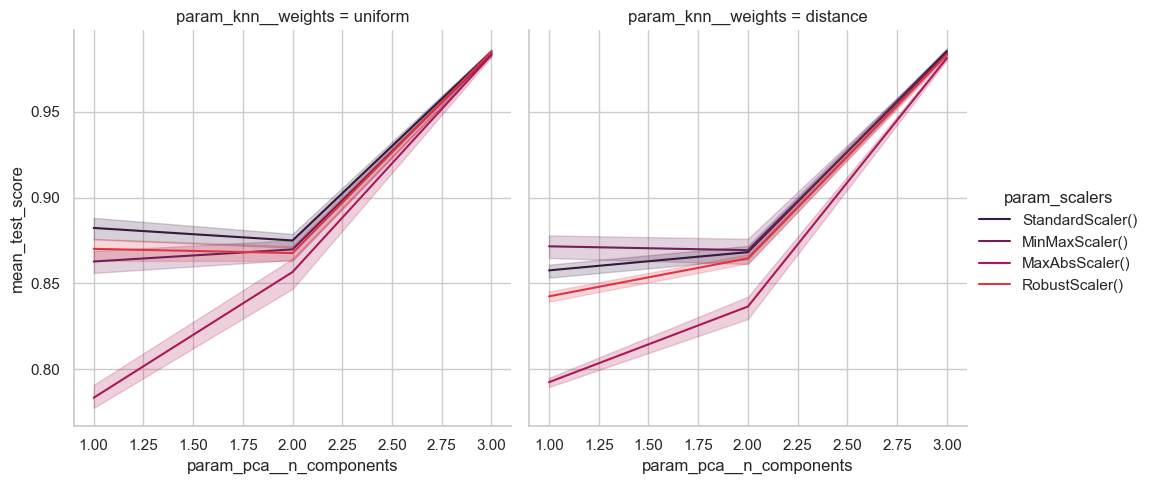

In [95]:
sns.relplot(data=gridPipeScaPcaKnnResults, kind='line',
            x='param_pca__n_components',
            y='mean_test_score',
            hue='param_scalers',
            col='param_knn__weights')
plt.show()

###  Polynomial regression

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps.
For example, we might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a ``Pipeline`` object, which can be used as follows:

In [96]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [97]:
gridCvParamsPolyReg = {
    'polynomialfeatures__degree': kRange,
    'linearregression__fit_intercept': [True, False],
}

gridSearchCvPolyReg = GridSearchCV(PolynomialRegression(), gridCvParamsPolyReg, cv=5)
gridSearchCvPolyReg.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19]})

In [98]:
gridSearchCvPolyReg.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}

### *Resources*

- scikit-learn documentation: [Grid search](https://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)

- [Data School](https://www.dataschool.io)
- [Open Machine Learning Course](https://mlcourse.ai/book/index.html)